<a href="https://colab.research.google.com/github/benmsanderson/transientio/blob/main/IO_transient_exiobase_fullecon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import stuff

In [ ]:
!pip install git+https://github.com/konstantinstadler/pymrio@master
import pymrio

  Cloning https://github.com/konstantinstadler/pymrio (to revision master) to /tmp/pip-req-build-2u8l5u82
  Running command git clone -q https://github.com/konstantinstadler/pymrio /tmp/pip-req-build-2u8l5u82
     |████████████████████████████████| 96 kB 3.5 MB/s 
  Created wheel for pymrio: filename=pymrio-0.4.7-py3-none-any.whl size=141597 sha256=6925ed21e41d123adb31404ba1b0dfd2ff16614ee4cc7ddb0db701ffad6f45e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-iqfhijd4/wheels/09/67/7c/a5fe97541a758d965c6da421a104ca61ce278ceb3771a3b251
Successfully built pymrio
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


Import modules

In [ ]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sparse
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns



Load Google Drive (if using)

In [ ]:
if 0
  from google.colab import drive
  drive.mount('/content/drive')
  
import os

#os.chdir(r"/content/drive/MyDrive/pymrio")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set folders and load MRIO

In [ ]:

save_folder_tr= '/content/drive/MyDrive/pymrio/transition'

wiod = pymrio.load_all(save_folder_tr)

In [ ]:
nreg=len(wiod.get_regions())

Define parameters

In [ ]:
#climate impacts
# agriculture +net $2.7 /ton CO2 to net costs of $8.5 /ton−



In [ ]:
cfdb=wiod.x.copy()*-.1


In [ ]:
cfdb

indout
region  sector                     
Europe  food          -5.558382e+04
        mining        -4.424582e+04
        manufactoring -7.607699e+05
        electricity   -5.811623e+04
        gas           -1.827506e+04
        construction  -4.670569e+05
        transport     -2.490287e+05
        other         -1.050942e+06
Asia    food          -1.296994e+05
        mining        -6.200874e+04
        manufactoring -1.311026e+06
        electricity   -4.894594e+04
        gas           -7.273027e+03
        construction  -4.604827e+05
        transport     -1.548536e+05
        other         -6.495620e+05
America food          -6.960119e+04
        mining        -7.278083e+04
        manufactoring -7.068700e+05
        electricity   -3.646068e+04
        gas           -8.023267e+03
        construction  -4.280310e+05
        transport     -2.177515e+05
        other         -1.349435e+06
Oceania food          -4.493931e+03
        mining        -1.286735e+04
        manufactoring -3.129367e+04
        electricity   -7.620992e+02
        gas           -3.058944e+02
        construction  -3.749243e+04
        transport     -1.352853e+04
        other         -7.557706e+04
Africa  food          -2.652235e+04
        mining        -1.900289e+04
        manufactoring -5.437653e+04
        electricity   -4.030648e+03
        gas           -5.009622e+02
        construction  -4.464953e+04
        transport     -2.076210e+04
        other         -6.687107e+04
Other   food          -4.012443e+04
        mining        -5.098078e+04
        manufactoring -1.679070e+05
        electricity   -1.361834e+04
        gas           -2.144068e+03
        construction  -1.334840e+05
        transport     -5.509680e+04
        other         -1.862458e+05

In [ ]:

#cfdb.loc[(slice(None), "food"),:]=wiod.x.loc[(slice(None), "food"),:]*-.1

In [ ]:
cfdb

indout
region  sector                     
Europe  food          -5.558382e+04
        mining        -4.424582e+04
        manufactoring -7.607699e+05
        electricity   -5.811623e+04
        gas           -1.827506e+04
        construction  -4.670569e+05
        transport     -2.490287e+05
        other         -1.050942e+06
Asia    food          -1.296994e+05
        mining        -6.200874e+04
        manufactoring -1.311026e+06
        electricity   -4.894594e+04
        gas           -7.273027e+03
        construction  -4.604827e+05
        transport     -1.548536e+05
        other         -6.495620e+05
America food          -6.960119e+04
        mining        -7.278083e+04
        manufactoring -7.068700e+05
        electricity   -3.646068e+04
        gas           -8.023267e+03
        construction  -4.280310e+05
        transport     -2.177515e+05
        other         -1.349435e+06
Oceania food          -4.493931e+03
        mining        -1.286735e+04
        manufactoring -3.129367e+04
        electricity   -7.620992e+02
        gas           -3.058944e+02
        construction  -3.749243e+04
        transport     -1.352853e+04
        other         -7.557706e+04
Africa  food          -2.652235e+04
        mining        -1.900289e+04
        manufactoring -5.437653e+04
        electricity   -4.030648e+03
        gas           -5.009622e+02
        construction  -4.464953e+04
        transport     -2.076210e+04
        other         -6.687107e+04
Other   food          -4.012443e+04
        mining        -5.098078e+04
        manufactoring -1.679070e+05
        electricity   -1.361834e+04
        gas           -2.144068e+03
        construction  -1.334840e+05
        transport     -5.509680e+04
        other         -1.862458e+05

In [ ]:
#define TCRE
tcre=1.5 #K/Eg (10^18 kg)
#define timestep
ts=10 #years
#define climate impacts on economy
#cfdb=np.repeat(np.array([-4,-4,-4,-4,-4,-4,-4,-4.]),nreg)*100000 ##million EUR per K
#define final demand
fd=wiod.Y.sum(axis=1)#M.EUR
#define climate emissions factors
ef=wiod.impacts.F.iloc[[3]]/wiod.x.T.squeeze()*12/44/1e15 #Eg per million EUR
fracch4=np.repeat(np.array([0.6,0.1,0.005,0,0.6,0,0,0]),nreg)
ef1=ef*(1-fracch4)
ef2=ef*fracch4


Define sectors, regions

In [ ]:
ef1

region                                                    Europe  \
sector                                                      food   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  1.462467e-10   

region                                                            \
sector                                                    mining   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  2.073539e-10   

region                                                            \
sector                                             manufactoring   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  1.976008e-11   

region                                                            \
sector                                               electricity   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  5.447645e-11   

region                                                            \
sector                                                       gas   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  6.749092e-11   

region                                                            \
sector                                              construction   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  6.393219e-12   

region                                                            \
sector                                                 transport   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  6.691449e-11   

region                                                            \
sector                                                     other   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  2.277754e-11   

region                                                      Asia  \
sector                                                      food   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  3.486665e-10   

region                                                            ...  \
sector                                                    mining  ...   
impact                                                            ...   
GHG emissions (GWP100) | Problem oriented appro...  4.927425e-10  ...   

region                                                    Africa  \
sector                                                 transport   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  4.116863e-11   

region                                                            \
sector                                                     other   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  1.194797e-10   

region                                                     Other  \
sector                                                      food   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  5.824887e-10   

region                                                            \
sector                                                    mining   
impact                                                             
GHG emissions (GWP100) | Problem oriented appro...  4.043896e-10   

region                                                            \
sector                                             manufactoring   
impact                

In [ ]:
wiod.x

indout
region  sector                     
Europe  food           5.558382e+05
        mining         4.424582e+05
        manufactoring  7.607699e+06
        electricity    5.811623e+05
        gas            1.827506e+05
        construction   4.670569e+06
        transport      2.490287e+06
        other          1.050942e+07
Asia    food           1.296994e+06
        mining         6.200874e+05
        manufactoring  1.311026e+07
        electricity    4.894594e+05
        gas            7.273027e+04
        construction   4.604827e+06
        transport      1.548536e+06
        other          6.495620e+06
America food           6.960119e+05
        mining         7.278083e+05
        manufactoring  7.068700e+06
        electricity    3.646068e+05
        gas            8.023267e+04
        construction   4.280310e+06
        transport      2.177515e+06
        other          1.349435e+07
Oceania food           4.493931e+04
        mining         1.286735e+05
        manufactoring  3.129367e+05
        electricity    7.620992e+03
        gas            3.058944e+03
        construction   3.749243e+05
        transport      1.352853e+05
        other          7.557706e+05
Africa  food           2.652235e+05
        mining         1.900289e+05
        manufactoring  5.437653e+05
        electricity    4.030648e+04
        gas            5.009622e+03
        construction   4.464953e+05
        transport      2.076210e+05
        other          6.687107e+05
Other   food           4.012443e+05
        mining         5.098078e+05
        manufactoring  1.679070e+06
        electricity    1.361834e+05
        gas            2.144068e+04
        construction   1.334840e+06
        transport      5.509680e+05
        other          1.862458e+06

In [ ]:
wiod.unit

unit
region  sector              
Europe  food           M.EUR
        mining         M.EUR
        manufactoring  M.EUR
        electricity    M.EUR
        gas            M.EUR
        construction   M.EUR
        transport      M.EUR
        other          M.EUR
Asia    food           M.EUR
        mining         M.EUR
        manufactoring  M.EUR
        electricity    M.EUR
        gas            M.EUR
        construction   M.EUR
        transport      M.EUR
        other          M.EUR
America food           M.EUR
        mining         M.EUR
        manufactoring  M.EUR
        electricity    M.EUR
        gas            M.EUR
        construction   M.EUR
        transport      M.EUR
        other          M.EUR
Oceania food           M.EUR
        mining         M.EUR
        manufactoring  M.EUR
        electricity    M.EUR
        gas            M.EUR
        construction   M.EUR
        transport      M.EUR
        other          M.EUR
Africa  food           M.EUR
        mining         M.EUR
        manufactoring  M.EUR
        electricity    M.EUR
        gas            M.EUR
        construction   M.EUR
        transport      M.EUR
        other          M.EUR
Other   food           M.EUR
        mining         M.EUR
        manufactoring  M.EUR
        electricity    M.EUR
        gas            M.EUR
        construction   M.EUR
        transport      M.EUR
        other          M.EUR

In [ ]:
wiod.impacts.unit

,unit
impact,
Value Added,M.EUR
Employment,1000 p.
Employment hour,hr
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",kg CO2 eq.
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",cases
...,...
Unused Domestic Extraction - Oil and Gas,kt
Unused Domestic Extraction - Non-metalic Minerals,kt
Unused Domestic Extraction - Iron Ore,kt


In [ ]:
wiod.get_sectors().tolist()

['food',
 'mining',
 'manufactoring',
 'electricity',
 'gas',
 'construction',
 'transport',
 'other']

In [ ]:
econ=wiod.get_sectors().tolist()#['sector1', 'sector2']
envr=['emisco2','emisch4','co2conc','ch4effect','T']

m2=pd.MultiIndex.from_product([['Impacts'],envr])
m1=wiod.get_index()
mu=m1.union(m2,sort=False)

_sectors = econ+envr
_regions = wiod.get_regions().tolist()#['reg1']
_times= np.arange(2000,2110,ts).astype('str')
#_Z_multiindex = pd.MultiIndex.from_product(
#                [_times, _regions, _sectors], names = [ u'times', u'region', u'sector'])
for i,t in enumerate(_times):
  print(i)
  # Convert index to dataframe
  old_idx = mu.to_frame()
  # Insert new level at specified location
  old_idx.insert(0, 'Year', t)
  # Convert back to MultiIndex
  muy = pd.MultiIndex.from_frame(old_idx)
  if i==0:
    _Z_multiindex=muy
  else:
    _Z_multiindex=_Z_multiindex.union(muy,sort=False)


0
1
2
3
4
5
6
7
8
9
10


In [ ]:
# Convert index to dataframe
old_idx = mu.to_frame()
# Insert new level at specified location
old_idx.insert(0, 'Year', 2000)
# Convert back to MultiIndex
muy = pd.MultiIndex.from_frame(old_idx)

In [ ]:

Y=wiod.A
A=np.identity(Y.shape[0])-Y
nsec=A.shape[0]

Af=A
Af


region                       Europe                                            \
sector                         food        mining manufactoring   electricity   
region  sector                                                                  
Europe  food           9.012608e-01 -3.789466e-03 -3.067151e-02 -1.271837e-03   
        mining        -1.481020e-03  9.276975e-01 -2.858877e-02 -1.858320e-02   
        manufactoring -1.638717e-01 -7.171208e-02  7.091900e-01 -6.101503e-02   
        electricity   -1.449348e-02 -1.683231e-02 -1.377778e-02  8.304120e-01   
        gas           -2.929151e-03 -1.445423e-03 -3.067290e-03 -9.240021e-02   
        construction  -7.453683e-02 -3.686135e-02 -6.363399e-02 -4.849675e-02   
        transport     -2.264627e-02 -4.905780e-02 -4.123405e-02 -3.071343e-02   
        other         -5.525803e-02 -5.616551e-02 -8.260040e-02 -6.480969e-02   
Asia    food          -8.543714e-04 -1.355996e-05 -1.784509e-04 -6.957276e-06   
        mining        -1.275859e-05 -4.529812e-05 -1.119055e-04 -1.423543e-05   
        manufactoring -7.011542e-03 -2.900455e-03 -1.626590e-02 -2.492496e-03   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -2.467189e-11 -1.561647e-09 -5.966187e-10 -3.541033e-09   
        construction  -6.927099e-04 -5.510830e-04 -9.444824e-04 -3.777215e-04   
        transport     -1.079195e-04 -4.216564e-04 -3.338078e-04 -5.552533e-04   
        other         -4.780769e-04 -4.903888e-04 -9.208904e-04 -4.405804e-04   
America food          -1.984915e-03 -3.092105e-05 -6.599920e-04 -1.546929e-05   
        mining        -6.088510e-05 -4.795775e-04 -2.000384e-03 -2.190393e-04   
        manufactoring -5.531545e-03 -1.562126e-03 -1.077388e-02 -1.932551e-03   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -8.318530e-11 -2.324976e-09 -1.134771e-09 -1.143546e-08   
        construction  -5.251305e-04 -6.036018e-04 -8.613377e-04 -3.557587e-04   
        transport     -2.087174e-04 -7.067633e-04 -6.661978e-04 -4.706339e-04   
        other         -1.057171e-03 -7.449175e-04 -2.748271e-03 -9.755023e-04   
Oceania food          -6.200402e-05 -1.586985e-06 -1.632436e-05 -2.902667e-07   
        mining        -2.521559e-05 -3.970350e-05 -1.675817e-04 -2.134821e-05   
        manufactoring -1.108343e-04 -3.803545e-05 -4.952448e-04 -5.490791e-05   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        construction  -8.996247e-05 -1.143285e-04 -1.126876e-04 -6.218845e-05   
        transport     -2.487893e-05 -5.159657e-05 -6.181192e-05 -6.969428e-05   
        other         -7.452154e-05 -6.421210e-05 -8.779142e-05 -5.086475e-05   
Africa  food          -3.950774e-03 -4.110424e-05 -6.309450e-04 -4.924562e-05   
        mining        -2.737008e-05 -6.869552e-04 -3.381368e-03 -1.748882e-03   
        manufactoring -1.692604e-03 -3.710294e-04 -2.948970e-03 -7.025387e-04   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -7.074580e-11 -1.876070e-09 -4.298617e-09 -1.171822e-08   
        construction  -1.750432e-04 -1.768147e-04 -2.319828e-04 -1.103560e-04   
        transport     -1.119193e-04 -4.738248e-04 -2.874925e-04 -2.090008e-04   
        other         -1.655317e-04 -9.724423e-05 -1.328541e-04 -8.029100e-05   
Other   food          -2.646632e-03 -4.289515e-05 -6.003366e-04 -2.929563e-05   
        mining        -3.379661e-05 -1.732910e-03 -8.054942e-03 -5.091009e-04   
        manufactoring -5.919711e-03 -1.469494e-03 -9.635079e-03 -1.991268e-03   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -6.832740e-09 -1.491575e-07 -3.699165e-07 -9.503109e-07   
        construction  -1.353590e-03 -8.609336e-04 -1.708425e-03 -5.608030e-04   
        transport     -3.095726

B matrix (elementary flows)

In [ ]:

B=np.stack([ef1.to_numpy()[0], #co2 emissions by sector (GtC/trillion USD)
            ef2.to_numpy()[0], #ch4 emissions by sector (GtC/trillion USD)
            np.zeros(len(ef1.to_numpy()[0])), #cumulative emissions (CO2, GtC)
            np.zeros(len(ef1.to_numpy()[0])), #delta-cc (CH4, GtC)
            np.zeros(len(ef1.to_numpy()[0]))]) #net temperature (K)
Bf = pd.DataFrame(
    data = np.array(B),
    index = envr,
    columns = wiod.get_index()
    )
Bf

region           Europe                                            \
sector             food        mining manufactoring   electricity   
emisco2    1.462467e-10  2.073539e-10  1.976008e-11  5.447645e-11   
emisch4    2.193700e-10  3.110309e-10  2.964012e-11  8.171467e-11   
co2conc    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
ch4effect  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
T          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

region                                                             \
sector              gas  construction     transport         other   
emisco2    6.749092e-11  6.393219e-12  6.691449e-11  2.277754e-11   
emisch4    1.012364e-10  9.589829e-12  7.434943e-12  2.530837e-12   
co2conc    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
ch4effect  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
T          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

region             Asia                ...        Africa                \
sector             food        mining  ...     transport         other   
emisco2    3.486665e-10  4.927425e-10  ...  4.116863e-11  1.194797e-10   
emisch4    3.874072e-11  5.474917e-11  ...  0.000000e+00  0.000000e+00   
co2conc    0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00   
ch4effect  0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00   
T          0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00   

region            Other                                            \
sector             food        mining manufactoring   electricity   
emisco2    5.824887e-10  4.043896e-10  1.836698e-10  1.479470e-09   
emisch4    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
co2conc    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
ch4effect  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
T          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

region                                                             
sector              gas  construction     transport         other  
emisco2    2.058187e-10  3.495406e-11  1.497924e-10  6.124720e-11  
emisch4    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
co2conc    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
ch4effect  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
T          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  

[5 rows x 48 columns]

Define final demand matrix

In [ ]:
mu

MultiIndex([( 'Europe',          'food'),
            ( 'Europe',        'mining'),
            ( 'Europe', 'manufactoring'),
            ( 'Europe',   'electricity'),
            ( 'Europe',           'gas'),
            ( 'Europe',  'construction'),
            ( 'Europe',     'transport'),
            ( 'Europe',         'other'),
            (   'Asia',          'food'),
            (   'Asia',        'mining'),
            (   'Asia', 'manufactoring'),
            (   'Asia',   'electricity'),
            (   'Asia',           'gas'),
            (   'Asia',  'construction'),
            (   'Asia',     'transport'),
            (   'Asia',         'other'),
            ('America',          'food'),
            ('America',        'mining'),
            ('America', 'manufactoring'),
            ('America',   'electricity'),
            ('America',           'gas'),
            ('America',  'construction'),
            ('America',     'transport'),
            ('America',         'o

In [ ]:
mnum=A.shape[0]+B.shape[0]
f=np.zeros((1,mnum))
f[0,:(len(fd))]=fd.T #trillion USD
econb=econ.copy()
ff = pd.DataFrame(
    data = np.array(f),
    index = ['demand'],
    columns = mu
    )
ff





Europe                                             \
                 food        mining manufactoring    electricity   
demand  210947.896664  67787.706396  3.408493e+06  186428.945313   

                                                                 \
                 gas  construction      transport         other   
demand  52121.570895  2.874993e+06  887597.150466  6.938149e+06   

                 Asia                ...         Other               \
                 food        mining  ...   electricity          gas   
demand  478516.132595  25403.468006  ...  33766.263274  9279.300555   

                                                   Impacts                  \
         construction      transport         other emisco2 emisch4 co2conc   
demand  750645.256244  140913.883839  1.274447e+06     0.0     0.0     0.0   

                       
       ch4effect    T  
demand       0.0  0.0  

[1 rows x 53 columns]

C matrix - Characterisation factors/flows in environment





In [ ]:
C=-1*np.identity(B.shape[0])
cf = pd.DataFrame(
    data = np.array(C),
    index = envr,
    columns = envr
    )
cf

,emisco2,emisch4,co2conc,ch4effect,T
emisco2,-1.0,-0.0,-0.0,-0.0,-0.0
emisch4,-0.0,-1.0,-0.0,-0.0,-0.0
co2conc,-0.0,-0.0,-1.0,-0.0,-0.0
ch4effect,-0.0,-0.0,-0.0,-1.0,-0.0
T,-0.0,-0.0,-0.0,-0.0,-1.0


D matrix - feedback flows

In [ ]:
D=np.zeros((A.shape[0],B.shape[0]))
D[:,B.shape[0]-1]=cfdb.T #temperature effect on production M.EUR per K
D[:,B.shape[0]-2]=0 #methane concentration effect on production M.EUR per Eg CH4 (CO2e)
D[:,B.shape[0]-3]=0 #carbon concentration effect on production M.EUR per Eg C

df = pd.DataFrame(
    data = np.array(D),
    index = wiod.get_index(),
    columns = envr
    )
df

emisco2  emisch4  co2conc  ch4effect             T
region  sector                                                           
Europe  food               0.0      0.0      0.0        0.0 -5.558382e+04
        mining             0.0      0.0      0.0        0.0 -4.424582e+04
        manufactoring      0.0      0.0      0.0        0.0 -7.607699e+05
        electricity        0.0      0.0      0.0        0.0 -5.811623e+04
        gas                0.0      0.0      0.0        0.0 -1.827506e+04
        construction       0.0      0.0      0.0        0.0 -4.670569e+05
        transport          0.0      0.0      0.0        0.0 -2.490287e+05
        other              0.0      0.0      0.0        0.0 -1.050942e+06
Asia    food               0.0      0.0      0.0        0.0 -1.296994e+05
        mining             0.0      0.0      0.0        0.0 -6.200874e+04
        manufactoring      0.0      0.0      0.0        0.0 -1.311026e+06
        electricity        0.0      0.0      0.0        0.0 -4.894594e+04
        gas                0.0      0.0      0.0        0.0 -7.273027e+03
        construction       0.0      0.0      0.0        0.0 -4.604827e+05
        transport          0.0      0.0      0.0        0.0 -1.548536e+05
        other              0.0      0.0      0.0        0.0 -6.495620e+05
America food               0.0      0.0      0.0        0.0 -6.960119e+04
        mining             0.0      0.0      0.0        0.0 -7.278083e+04
        manufactoring      0.0      0.0      0.0        0.0 -7.068700e+05
        electricity        0.0      0.0      0.0        0.0 -3.646068e+04
        gas                0.0      0.0      0.0        0.0 -8.023267e+03
        construction       0.0      0.0      0.0        0.0 -4.280310e+05
        transport          0.0      0.0      0.0        0.0 -2.177515e+05
        other              0.0      0.0      0.0        0.0 -1.349435e+06
Oceania food               0.0      0.0      0.0        0.0 -4.493931e+03
        mining             0.0      0.0      0.0        0.0 -1.286735e+04
        manufactoring      0.0      0.0      0.0        0.0 -3.129367e+04
        electricity        0.0      0.0      0.0        0.0 -7.620992e+02
        gas                0.0      0.0      0.0        0.0 -3.058944e+02
        construction       0.0      0.0      0.0        0.0 -3.749243e+04
        transport          0.0      0.0      0.0        0.0 -1.352853e+04
        other              0.0      0.0      0.0        0.0 -7.557706e+04
Africa  food               0.0      0.0      0.0        0.0 -2.652235e+04
        mining             0.0      0.0      0.0        0.0 -1.900289e+04
        manufactoring      0.0      0.0      0.0        0.0 -5.437653e+04
        electricity        0.0      0.0      0.0        0.0 -4.030648e+03
        gas                0.0      0.0      0.0        0.0 -5.009622e+02
        construction       0.0      0.0      0.0        0.0 -4.464953e+04
        transport          0.0      0.0      0.0        0.0 -2.076210e+04
        other              0.0      0.0      0.0        0.0 -6.687107e+04
Other   food               0.0      0.0      0.0        0.0 -4.012443e+04
        mining             0.0      0.0      0.0        0.0 -5.098078e+04
        manufactoring      0.0      0.0      0.0        0.0 -1.679070e+05
        electricity        0.0      0.0      0.0        0.0 -1.361834e+04
        gas                0.0      0.0      0.0        0.0 -2.144068e+03
        construction       0.0      0.0      0.0        0.0 -1.334840e+05
        transport          0.0      0.0      0.0        0.0 -5.509680e+04
        other              0.0      0.0      0.0        0.0 -1.862458e+05

Build full X matrix

In [ ]:


X=np.vstack((np.hstack((A,D)),np.hstack((B,C))))
xf = pd.DataFrame(
    data = np.array(X),
    index = mu,
    columns = mu
    )
xf

Europe                                            \
                               food        mining manufactoring   electricity   
Europe  food           9.012608e-01 -3.789466e-03 -3.067151e-02 -1.271837e-03   
        mining        -1.481020e-03  9.276975e-01 -2.858877e-02 -1.858320e-02   
        manufactoring -1.638717e-01 -7.171208e-02  7.091900e-01 -6.101503e-02   
        electricity   -1.449348e-02 -1.683231e-02 -1.377778e-02  8.304120e-01   
        gas           -2.929151e-03 -1.445423e-03 -3.067290e-03 -9.240021e-02   
        construction  -7.453683e-02 -3.686135e-02 -6.363399e-02 -4.849675e-02   
        transport     -2.264627e-02 -4.905780e-02 -4.123405e-02 -3.071343e-02   
        other         -5.525803e-02 -5.616551e-02 -8.260040e-02 -6.480969e-02   
Asia    food          -8.543714e-04 -1.355996e-05 -1.784509e-04 -6.957276e-06   
        mining        -1.275859e-05 -4.529812e-05 -1.119055e-04 -1.423543e-05   
        manufactoring -7.011542e-03 -2.900455e-03 -1.626590e-02 -2.492496e-03   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -2.467189e-11 -1.561647e-09 -5.966187e-10 -3.541033e-09   
        construction  -6.927099e-04 -5.510830e-04 -9.444824e-04 -3.777215e-04   
        transport     -1.079195e-04 -4.216564e-04 -3.338078e-04 -5.552533e-04   
        other         -4.780769e-04 -4.903888e-04 -9.208904e-04 -4.405804e-04   
America food          -1.984915e-03 -3.092105e-05 -6.599920e-04 -1.546929e-05   
        mining        -6.088510e-05 -4.795775e-04 -2.000384e-03 -2.190393e-04   
        manufactoring -5.531545e-03 -1.562126e-03 -1.077388e-02 -1.932551e-03   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -8.318530e-11 -2.324976e-09 -1.134771e-09 -1.143546e-08   
        construction  -5.251305e-04 -6.036018e-04 -8.613377e-04 -3.557587e-04   
        transport     -2.087174e-04 -7.067633e-04 -6.661978e-04 -4.706339e-04   
        other         -1.057171e-03 -7.449175e-04 -2.748271e-03 -9.755023e-04   
Oceania food          -6.200402e-05 -1.586985e-06 -1.632436e-05 -2.902667e-07   
        mining        -2.521559e-05 -3.970350e-05 -1.675817e-04 -2.134821e-05   
        manufactoring -1.108343e-04 -3.803545e-05 -4.952448e-04 -5.490791e-05   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        construction  -8.996247e-05 -1.143285e-04 -1.126876e-04 -6.218845e-05   
        transport     -2.487893e-05 -5.159657e-05 -6.181192e-05 -6.969428e-05   
        other         -7.452154e-05 -6.421210e-05 -8.779142e-05 -5.086475e-05   
Africa  food          -3.950774e-03 -4.110424e-05 -6.309450e-04 -4.924562e-05   
        mining        -2.737008e-05 -6.869552e-04 -3.381368e-03 -1.748882e-03   
        manufactoring -1.692604e-03 -3.710294e-04 -2.948970e-03 -7.025387e-04   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -7.074580e-11 -1.876070e-09 -4.298617e-09 -1.171822e-08   
        construction  -1.750432e-04 -1.768147e-04 -2.319828e-04 -1.103560e-04   
        transport     -1.119193e-04 -4.738248e-04 -2.874925e-04 -2.090008e-04   
        other         -1.655317e-04 -9.724423e-05 -1.328541e-04 -8.029100e-05   
Other   food          -2.646632e-03 -4.289515e-05 -6.003366e-04 -2.929563e-05   
        mining        -3.379661e-05 -1.732910e-03 -8.054942e-03 -5.091009e-04   
        manufactoring -5.919711e-03 -1.469494e-03 -9.635079e-03 -1.991268e-03   
        electricity    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        gas           -6.832740e-09 -1.491575e-07 -3.699165e-07 -9.503109e-07   
        construction  -1.353590e-03 -8.609336e-04 -1.708425e-03 -5.608030e-04   
        transport     -3.095726e-04 -8.469782e-04 -9.873656e-04 -7.156405e-04   
        other         -7.262119e-04 -5.669204e-04 -1.314826e

Replicate X matrix for each time period

In [ ]:
#A_r=la.block_diag(X,X,X,X)
A_r=sparse.block_diag([X for _ in enumerate(_times)]).A

Define lifetime of forcers, add off-diagonal terms to transaction matrix

In [ ]:
for i,t in enumerate(_times):
  for j,tt in enumerate(_times):
    if i<=j:
      #timescale concentration ppols
      tmpco2=1*np.exp(-(int(tt)-int(t))/1000) #very slow decay of co2
      tmpch4=1*np.exp(-(int(tt)-int(t))/10) #rapid decay of ch4

      #transfer emissions to cumulative CO2
      A_r[j*mnum+nsec+2,i*mnum+nsec]=tmpco2 #Eg in atmosphere at time j per Eg emitted at time i 
      #transfer emissions to cumulative CO2
      A_r[j*mnum+nsec+3,i*mnum+nsec+1]=tmpch4 #Eg (CO2e100) in atmosphere at time j per Eg emitted at time i
      #co2 effect on temperature
      A_r[j*mnum+nsec+4,j*mnum+nsec+2]=tcre*ts #TCRE * timestep - warming (K) per Eg CO2 in atmoshpere 
      #ch4 effect on temperature
      A_r[j*mnum+nsec+4,j*mnum+nsec+3]=tcre*ts #TCRE * timestep - warming (K) per Eg CH4 (CO2e) in atmoshpere 

Build dataframe for interpretation

In [ ]:
A_r.shape

(583, 583)

In [ ]:
Z = pd.DataFrame(
    data = np.array(A_r),
    index = _Z_multiindex,
    columns = _Z_multiindex
    )
Z

Year                            2000                                      \
0                             Europe                                       
1                               food    mining manufactoring electricity   
Year 0       1                                                             
2000 Europe  food           0.901261 -0.003789     -0.030672   -0.001272   
             mining        -0.001481  0.927698     -0.028589   -0.018583   
             manufactoring -0.163872 -0.071712      0.709190   -0.061015   
             electricity   -0.014493 -0.016832     -0.013778    0.830412   
             gas           -0.002929 -0.001445     -0.003067   -0.092400   
...                              ...       ...           ...         ...   
2100 Impacts emisco2        0.000000  0.000000      0.000000    0.000000   
             emisch4        0.000000  0.000000      0.000000    0.000000   
             co2conc        0.000000  0.000000      0.000000    0.000000   
             ch4effect      0.000000  0.000000      0.000000    0.000000   
             T              0.000000  0.000000      0.000000    0.000000   

Year                                                                   \
0                                                                       
1                                gas construction transport     other   
Year 0       1                                                          
2000 Europe  food          -0.000679    -0.002994 -0.000475 -0.001470   
             mining        -0.061500    -0.005599 -0.001111 -0.001053   
             manufactoring -0.083078    -0.132292 -0.055442 -0.044615   
             electricity   -0.109213    -0.007842 -0.008561 -0.008751   
             gas            0.943860    -0.001275 -0.000937 -0.001261   
...                              ...          ...       ...       ...   
2100 Impacts emisco2        0.000000     0.000000  0.000000  0.000000   
             emisch4        0.000000     0.000000  0.000000  0.000000   
             co2conc        0.000000     0.000000  0.000000  0.000000   
             ch4effect      0.000000     0.000000  0.000000  0.000000   
             T              0.000000     0.000000  0.000000  0.000000   

Year                                                    ...          2100  \
0                                   Asia                ...         Other   
1                                   food        mining  ...   electricity   
Year 0       1                                          ...                 
2000 Europe  food          -1.913487e-04 -1.137537e-04  ...  0.000000e+00   
             mining        -9.488402e-06 -8.409673e-04  ...  0.000000e+00   
             manufactoring -2.577641e-03 -6.110582e-03  ...  0.000000e+00   
             electricity    0.000000e+00  0.000000e+00  ...  0.000000e+00   
             gas           -3.515277e-11 -2.044957e-09  ...  0.000000e+00   
...                                  ...           ...  ...           ...   
2100 Impacts emisco2        0.000000e+00  0.000000e+00  ...  1.479470e-09   
             emisch4        0.000000e+00  0.000000e+00  ...  0.000000e+00   
             co2conc        0.000000e+00  0.000000e+00  ...  0.000000e+00   
             ch4effect      0.000000e+00  0.000000e+00  ...  0.000000e+00   
             T              0.000000e+00  0.000000e+00  ...  0.000000e+00   

Year                                                                  \
0                                                                      
1                                    gas  construction     transport   
Year 0       1                                                         
2000 Europe  food           0.000000e+00  0.000000e+00  0.000000e+00   
             mining         0.000000e+00  0.000000e+00  0.000000e+00   
             manufactoring  0.000000e+00  0.000000e+00  0.000000e+00   
             electricity    0.000000e+00  0.000000e+00  0.000000e+00   
             gas            0.0

Make transient final demand vector

In [ ]:
f_r=np.tile(f,(1,len(_times))).T
_categories = ['final demand']
_fd_multiindex = pd.MultiIndex.from_product(
                 [ _categories], names = [ u'category'])
Y = pd.DataFrame(
    data=f_r,
    index = _Z_multiindex,
    columns = _fd_multiindex)

Solve system

In [ ]:
#solve for climate impacts
Ai=la.inv(Z)

Aif = pd.DataFrame(
    data=Ai,
    index = _Z_multiindex,
    columns = _Z_multiindex)

Apply system to demand

In [ ]:
P=Ai.dot(Y)
_categories = ['output']
_o_multiindex = pd.MultiIndex.from_product(
                 [ _categories], names = [u'category'])
Pf = pd.DataFrame(
    data=P,
    index = _Z_multiindex,
    columns = _o_multiindex)

In [ ]:
Pf.loc[(slice(None),['OECD','Other'],['electricity']), :]


,,category,output
Year,0,1,
2000,Other,electricity,135717.211020
2010,Other,electricity,139689.593407
2020,Other,electricity,143609.841283
2030,Other,electricity,147548.151259
2040,Other,electricity,151531.000697
2050,Other,electricity,155568.738382
2060,Other,electricity,159665.768637
2070,Other,electricity,163824.310511
2080,Other,electricity,168045.785470


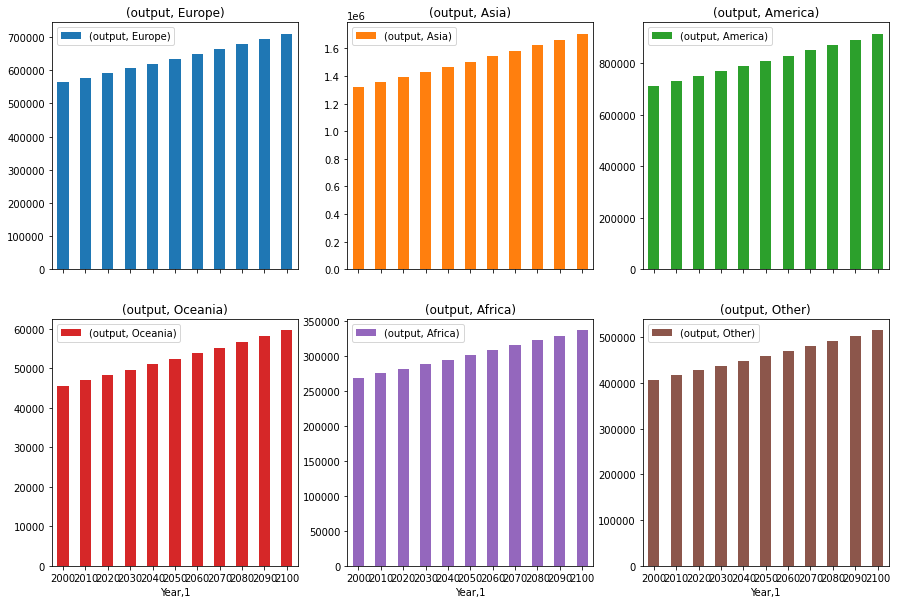

In [ ]:
ax = Pf.loc[(slice(None),slice(None),['food','manufacturing']), :].unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(15, 10), layout=(2, 3))
for axis in ax.flatten():
    axis.set_xticklabels(_times)





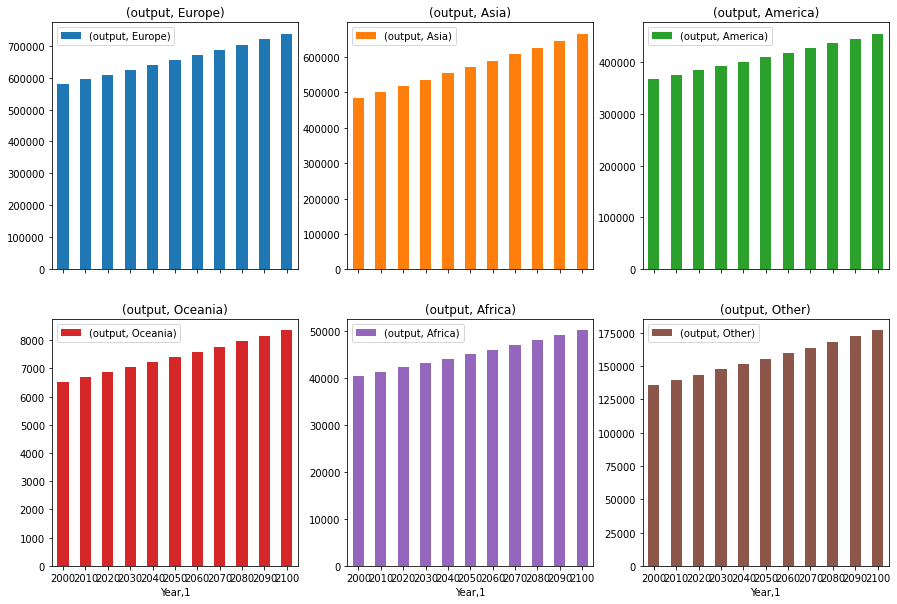

In [ ]:
ax = Pf.loc[(slice(None),slice(None),['electricity']), :].unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(15, 10), layout=(2, 3))
for axis in ax.flatten():
    axis.set_xticklabels(_times)





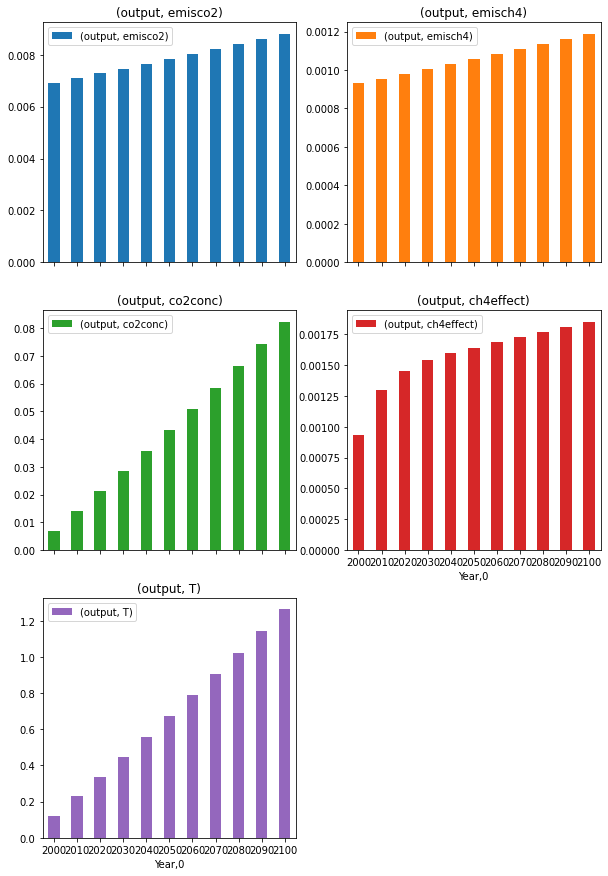

In [ ]:
ax = Pf.loc[(slice(None),['Impacts'],slice(None)), :].unstack(level=2).plot(kind='bar', subplots=True, rot=0, figsize=(10, 15), layout=(3, 2))
for axis in ax.flatten():
    axis.set_xticklabels(_times)